# Import necessary libraries

In [95]:
import random
import json
import pickle

# numpy==1.23.1
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.optimizers import SGD

# Loading dataset for training

In [96]:
lemmatizer = WordNetLemmatizer()
emotionData = json.loads(open("jsons/emotions.json").read())

# Necessary variable

In [97]:
words = []
classes = []
documents = []
ignore_letters = ["?", "!", ",", "."]

# Appending item from emotions.json

In [98]:
for item_emo in emotionData:
    word_list = nltk.word_tokenize(item_emo["Text"])
    words.extend(word_list)
    documents.append((word_list, item_emo["Emotion"]))
    if item_emo["Emotion"] not in classes:
        classes.append(item_emo["Emotion"])

# Stemming the word by WordNetLemmatizer

In [99]:
words = [lemmatizer.lemmatize(word) for word in words if word not in ignore_letters]

# Remove duplicated value by casting to a set then casting it back to a list by sorted()

In [100]:
words = sorted(set(words))
classes = sorted(set(classes))

# Saving words and classes as a pickle file for using it in chatbot

In [101]:
pickle.dump(words, open("assets/word.pkl", "wb"))
pickle.dump(classes, open("assets/classes.pkl", "wb"))

# Training data

In [102]:
training = []
output_empty = [0] * len(classes)

# Make the text in documents to be the numeric data

In [103]:
for item_doc in documents:
    bag = []
    word_patterns = item_doc[0]
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(item_doc[1])] = 1
    training.append([bag, output_row])

# Shuffle the data and cast it into an array

In [104]:
random.shuffle(training)
training = np.array(training, dtype=object)

# Separate the training data: text into x and tag into y

In [105]:
train_x = list(training[:, 0])
train_y = list(training[:, 1])

In [106]:
print(train_x[0])
print(train_y[0])


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Build the model

In [107]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation="softmax"))

sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               168064    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         


                                                                 
 dense_17 (Dense)            (None, 6)                 390       
                                                                 
Total params: 176710 (690.27 KB)
Trainable params: 176710 (690.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training and save the file for using in chatbot for predicate

In [108]:
hist = model.fit(np.array(train_x), np.array(train_y), validation_split=0.2, epochs=50, batch_size=32, verbose=1)

model.save("model/chatbot_model.h5", hist)
print("Done")

Epoch 1/50
82/82 [==============================] - 1s 3ms/step - loss: 1.5093 - accuracy: 0.4235 - val_loss: 0.9627 - val_accuracy: 0.8792
Epoch 2/50
82/82 [==============================] - 0s 2ms/step - loss: 0.7630 - accuracy: 0.7737 - val_loss: 0.3476 - val_accuracy: 0.9297
Epoch 3/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8838 - val_loss: 0.1676 - val_accuracy: 0.9633
Epoch 4/50
82/82 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.9335 - val_loss: 0.1139 - val_accuracy: 0.9694
Epoch 5/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.9580 - val_loss: 0.0883 - val_accuracy: 0.9771
Epoch 6/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9629 - val_loss: 0.0762 - val_accuracy: 0.9771
Epoch 7/50
82/82 [==============================] - 0s 2ms/step - loss: 0.1014 - accuracy: 0.9786 - val_loss: 0.0647 - val_accuracy: 0.9801
Epoch 8/50
82/82 [==

# List all data in history

In [109]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Summarize history for accuracy

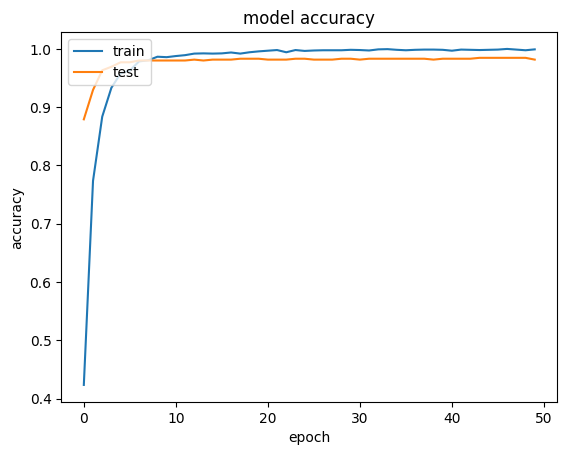

In [110]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# Summarize history for loss

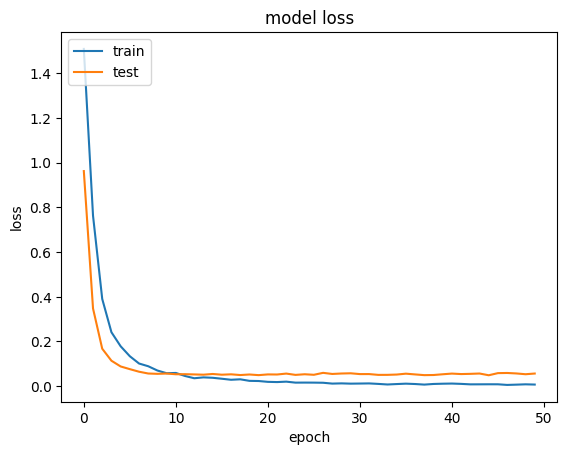

In [111]:
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()